In [22]:
# Data Import and Manipulation:
import pandas as pd
import numpy as np
import yfinance as yf

# Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns



# Data Splitting and Validation:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Regression Models:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Regression Metrics:
from sklearn.metrics import r2_score, mean_squared_error

# Statistical Analysis:
import itertools
from itertools import combinations
from scipy.stats import pearsonr

In [23]:
# Read the dataset
data = pd.read_csv('Britannia Daily.csv')
data.head()

,Unnamed: 0,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume,Polarity
0,0,2010-01-01,0.0,0.0,1863.0,0.209339,8,positive
1,1,2010-01-03,0.0,0.0,176.0,0.000000,1,negative
2,2,2010-01-04,0.0,0.0,282.0,0.000000,2,negative
3,3,2010-01-05,0.0,0.0,352.0,-0.087850,2,negative
4,4,2010-01-06,0.0,0.0,352.0,-0.229400,2,negative


In [24]:
len(data)

4561

In [25]:
# Drop the columns 'Unnamed: 0','Polarity'
daily = data.drop(['Unnamed: 0','Polarity'],axis=1)
daily.head()

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
0,2010-01-01,0.0,0.0,1863.0,0.209339,8
1,2010-01-03,0.0,0.0,176.0,0.000000,1
2,2010-01-04,0.0,0.0,282.0,0.000000,2
3,2010-01-05,0.0,0.0,352.0,-0.087850,2
4,2010-01-06,0.0,0.0,352.0,-0.229400,2


In [29]:
# convert the 'Date' column of a pandas DataFrame named daily to a datetime format
daily['Date'] = pd.to_datetime(daily['Date'])

# set the 'Date' column as the index of the DataFrame
daily = daily.set_index('Date')

In [30]:
daily.head(3)

,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
Date,,,,,
2010-01-01,0.0,0.0,1863.0,0.209339,8
2010-01-03,0.0,0.0,176.0,0.000000,1
2010-01-04,0.0,0.0,282.0,0.000000,2


### WEEKLY TWITTER DATA

In [31]:
# returns the weighted average of the 'Daily_Avg_Sentiment_Score' column by the 'Tweet Volume' column
def weighted_avg(x):
    return (x['Daily_Avg_Sentiment_Score'] * x['Tweet Volume']).sum() / x['Tweet Volume'].sum()

# daily DataFrame is resampled on weekly basis using the resample() method with the argument 'W' to indicate weekly frequency
weekly = daily.resample('W').apply(weighted_avg)

In [32]:
# Convert to dataframe
weekly = pd.DataFrame(weekly)
weekly.head()

,0
Date,
2010-01-03,0.186079
2010-01-10,-0.094425
2010-01-17,0.259236
2010-01-24,0.004392
2010-01-31,0.159679


In [33]:
# Rename the columns '0'
weekly.rename(columns={0: 'Weighted_Avg_Sentiment_Score'}, inplace=True)
weekly.head(3)

,Weighted_Avg_Sentiment_Score
Date,
2010-01-03,0.186079
2010-01-10,-0.094425
2010-01-17,0.259236


In [34]:
# data is resampled at a weekly frequency ('W') and mean value of the 'Follower Count' is calculated for each week 
weekly['Mean Follower Count'] = daily['Follower Count'].resample('W').mean()

#data is resampled at a weekly frequency ('W') and mean value of the 'Like Count' is calculated for each week 
weekly['Mean Like Count'] = daily['Like Count'].resample('W').mean()

# data is resampled at a weekly frequency ('W') and mean value of the 'Retweet Count' is calculated for each week 
weekly['Mean Retweet Count'] = daily['Retweet Count'].resample('W').mean()

# data is resampled at a weekly frequency ('W') and mean value of the 'Tweet Volume' is calculated for each week 
weekly['Weekly Tweet Volume'] = daily['Tweet Volume'].resample('W').mean()

In [35]:
# Column names of the dataframe 'weekly'
weekly.columns

Index(['Weighted_Avg_Sentiment_Score', 'Mean Follower Count',
       'Mean Like Count', 'Mean Retweet Count', 'Weekly Tweet Volume'],
      dtype='object')

In [36]:
weekly.head()

,Weighted_Avg_Sentiment_Score,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume
Date,,,,,
2010-01-03,0.186079,1019.500000,0.0,0.0,4.500000
2010-01-10,-0.094425,374.333333,0.0,0.0,2.000000
2010-01-17,0.259236,890.571429,0.0,0.0,4.000000
2010-01-24,0.004392,541.571429,0.0,0.0,3.142857
2010-01-31,0.159679,1365.714286,0.0,0.0,4.428571


In [37]:
# calculate the mean sentiment score for each week
weekly['Mean Sentiment Score'] =  daily.resample('W').apply(weighted_avg)

# Drop the repeated column 'Weighted_Avg_Sentiment_Score'
weekly = weekly.drop(columns=['Weighted_Avg_Sentiment_Score'], axis=1)
weekly.head()

,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score
Date,,,,,
2010-01-03,1019.500000,0.0,0.0,4.500000,0.186079
2010-01-10,374.333333,0.0,0.0,2.000000,-0.094425
2010-01-17,890.571429,0.0,0.0,4.000000,0.259236
2010-01-24,541.571429,0.0,0.0,3.142857,0.004392
2010-01-31,1365.714286,0.0,0.0,4.428571,0.159679


In [52]:
# define a function to map the sentiment scores to categories
def get_sentiment_category(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
# map the sentiment scores to categories and create a new 'category' column
weekly['Polarity'] = weekly['Mean Sentiment Score'].apply(get_sentiment_category)

# print the first 10 rows of the dataframe to verify the results
weekly.head()

,Date,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Year
0,2010-01-03,1019.500000,0.0,0.0,4.500000,0.186079,Positive,2010
1,2010-01-10,374.333333,0.0,0.0,2.000000,-0.094425,Negative,2010
2,2010-01-17,890.571429,0.0,0.0,4.000000,0.259236,Positive,2010
3,2010-01-24,541.571429,0.0,0.0,3.142857,0.004392,Neutral,2010
4,2010-01-31,1365.714286,0.0,0.0,4.428571,0.159679,Positive,2010


In [53]:
weekly = weekly[weekly['Polarity']!='Neutral']

In [54]:
# Get value_counts for each category of "Polarity"
weekly['Polarity'].value_counts()

Positive    588
Negative     27
Name: Polarity, dtype: int64

In [55]:
weekly = weekly.reset_index()

In [56]:
weekly.head()

,index,Date,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Year
0,0,2010-01-03,1019.500000,0.0,0.0,4.500000,0.186079,Positive,2010
1,1,2010-01-10,374.333333,0.0,0.0,2.000000,-0.094425,Negative,2010
2,2,2010-01-17,890.571429,0.0,0.0,4.000000,0.259236,Positive,2010
3,4,2010-01-31,1365.714286,0.0,0.0,4.428571,0.159679,Positive,2010
4,5,2010-02-07,645.000000,0.0,0.0,2.571429,0.087001,Positive,2010


In [57]:
# Extract the year from the Date column
weekly['Year'] = weekly['Date'].dt.year

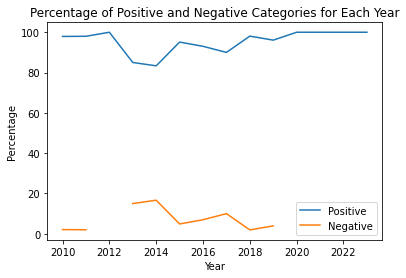

In [58]:
# group the 'maggi' DataFrame by 'Year' and counts the number of tweets in each year using the groupby() and count() methods.
total_counts = weekly.groupby('Year')['Polarity'].count()

# calculates the percentage of positive and negative tweets for each year by filtering the 'maggi' DataFrame based on the 'Polarity' column and applying the groupby() and count() methods
positive_perc = weekly[weekly['Polarity'] == 'Positive'].groupby('Year')['Polarity'].count() / total_counts * 100
negative_perc = weekly[weekly['Polarity'] == 'Negative'].groupby('Year')['Polarity'].count() / total_counts * 100

# Plot the percentages of positive and negative tweets for each year
plt.plot(positive_perc.index, positive_perc.values, label='Positive')
plt.plot(negative_perc.index, negative_perc.values, label='Negative')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Positive and Negative Categories for Each Year')
plt.legend()

# Show the plot
plt.show() 

# Negative sentiment is high and positive is low in 2011, 2013 and 2015

In [59]:
positive_perc

Year
2010     97.916667
2011     98.000000
2012    100.000000
2013     85.000000
2014     83.333333
2015     95.121951
2016     93.023256
2017     90.000000
2018     98.076923
2019     96.078431
2020    100.000000
2021    100.000000
2022    100.000000
2023    100.000000
Name: Polarity, dtype: float64

### WEEKLY STOCK DATA

In [46]:
# Set the stock ticker and the start and end dates
ticker = "BRITANNIA.NS"
start_date = "2010-01-01"
end_date = "2023-03-28"

# Download the historical data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Convert the index to a datetime object 
data.index = pd.to_datetime(data.index)

# group the data by the week starting on a Sunday
stock = data.groupby(pd.Grouper(freq="W-SUN")).mean()
stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-10,166.417001,168.181000,164.941000,165.944000,135.219522,206026.0
2010-01-17,167.445001,168.680002,165.603998,167.059998,136.128885,344134.0
2010-01-24,167.375998,168.932001,165.291000,166.495999,135.669302,22316.0
2010-01-31,162.212498,162.957497,157.377499,159.206245,129.729267,44520.0
2010-02-07,158.943002,161.142999,156.961002,159.763998,130.183740,14878.0


In [47]:
# Only select columns 'Adj Close','Volume'
stock = stock[['Adj Close','Volume']]
stock.head()

,Adj Close,Volume
Date,,
2010-01-10,135.219522,206026.0
2010-01-17,136.128885,344134.0
2010-01-24,135.669302,22316.0
2010-01-31,129.729267,44520.0
2010-02-07,130.183740,14878.0


In [49]:
# resulting object, nestle_yearly, will contain the mean closing prices of Nestle stock for each year in the original data
yearly = stock['Adj Close'].resample(rule='A').mean()

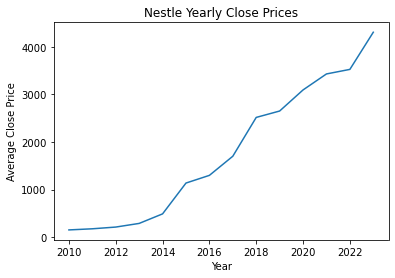

In [50]:
# create a line plot of the resampled Nestle stock closing prices
plt.plot(yearly.index.year, yearly.values)
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Nestle Yearly Close Prices')
plt.show() 

# There was minor decrease in stock value in 2015 correspoding to the negative sentiment.
# No significant decrease can be noted otherwise

In [60]:
yearly

Date
2010-12-31     153.004208
2011-12-31     176.618514
2012-12-31     212.926381
2013-12-31     289.527484
2014-12-31     489.961960
2015-12-31    1137.626324
2016-12-31    1299.079039
2017-12-31    1700.925323
2018-12-31    2516.682119
2019-12-31    2650.943596
2020-12-31    3093.917252
2021-12-31    3430.009531
2022-12-31    3525.588248
2023-12-31    4306.078793
Freq: A-DEC, Name: Adj Close, dtype: float64

In [26]:
# calculate the difference between the adjusted closing price of the current week and the previous week
stock['Price Difference'] = stock['Adj Close'].diff()

# remove any rows that contain missing values
stock.dropna(inplace=True)

# assign values to represent a rising or falling stock trend
Rise = 1
Fall = 0

# If the Price Difference value is greater than zero, the Stock Trend value is set to Rise (i.e. 1), otherwise it is set to Fall (i.e. 0).
stock['Stock Trend'] = np.where(stock['Price Difference']>0, Rise, Fall)
stock.head()

,Adj Close,Volume,Price Difference,Stock Trend
Date,,,,
2010-01-17,138.462903,344134.0,0.924957,1
2010-01-24,137.995456,22316.0,-0.467447,0
2010-01-31,131.953568,44520.0,-6.041888,0
2010-02-07,132.415833,14878.0,0.462265,1
2010-02-14,134.122993,30620.0,1.707161,1


In [27]:
stock = stock.reset_index()

stock.head()

,Date,Adj Close,Volume,Price Difference,Stock Trend
0,2010-01-17,138.462903,344134.0,0.924957,1
1,2010-01-24,137.995456,22316.0,-0.467447,0
2,2010-01-31,131.953568,44520.0,-6.041888,0
3,2010-02-07,132.415833,14878.0,0.462265,1
4,2010-02-14,134.122993,30620.0,1.707161,1


### COMBINED DATA

In [28]:
weekly.head()

,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity
Date,,,,,,
2010-01-03,1019.500000,0.0,0.0,4.500000,0.186079,Positive
2010-01-10,374.333333,0.0,0.0,2.000000,-0.094425,Negative
2010-01-17,890.571429,0.0,0.0,4.000000,0.259236,Positive
2010-01-24,541.571429,0.0,0.0,3.142857,0.004392,Positive
2010-01-31,1365.714286,0.0,0.0,4.428571,0.159679,Positive


In [29]:
weekly = weekly.reset_index() 

# Convert the 'Date' column to datetime format
weekly['Date'] = pd.to_datetime(weekly['Date'])

# Remove timezone information
weekly['Date'] = weekly['Date'].dt.tz_localize(None)

In [30]:
weekly.head()

,Date,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity
0,2010-01-03,1019.500000,0.0,0.0,4.500000,0.186079,Positive
1,2010-01-10,374.333333,0.0,0.0,2.000000,-0.094425,Negative
2,2010-01-17,890.571429,0.0,0.0,4.000000,0.259236,Positive
3,2010-01-24,541.571429,0.0,0.0,3.142857,0.004392,Positive
4,2010-01-31,1365.714286,0.0,0.0,4.428571,0.159679,Positive


In [31]:
# merge the 'weekly' dataframe with the 'stock' dataframe on the common column 'Date'
data = pd.merge(weekly, stock, on='Date')

# length of the merged dataframe data
print(len(data))

data.head(3)

690


,Date,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Adj Close,Volume,Price Difference,Stock Trend
0,2010-01-17,890.571429,0.0,0.0,4.000000,0.259236,Positive,138.462903,344134.0,0.924957,1
1,2010-01-24,541.571429,0.0,0.0,3.142857,0.004392,Positive,137.995456,22316.0,-0.467447,0
2,2010-01-31,1365.714286,0.0,0.0,4.428571,0.159679,Positive,131.953568,44520.0,-6.041888,0


In [32]:
# map the values in the "Polarity" column from "Positive" to 1 and "Negative" to 0.
data["Polarity"] = data["Polarity"].map({"Positive": 1, "Negative": 0})
data.head(3)

,Date,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Adj Close,Volume,Price Difference,Stock Trend
0,2010-01-17,890.571429,0.0,0.0,4.000000,0.259236,1,138.462903,344134.0,0.924957,1
1,2010-01-24,541.571429,0.0,0.0,3.142857,0.004392,1,137.995456,22316.0,-0.467447,0
2,2010-01-31,1365.714286,0.0,0.0,4.428571,0.159679,1,131.953568,44520.0,-6.041888,0


In [33]:
data = data.set_index('Date')
data.head(3)

,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Adj Close,Volume,Price Difference,Stock Trend
Date,,,,,,,,,,
2010-01-17,890.571429,0.0,0.0,4.000000,0.259236,1,138.462903,344134.0,0.924957,1
2010-01-24,541.571429,0.0,0.0,3.142857,0.004392,1,137.995456,22316.0,-0.467447,0
2010-01-31,1365.714286,0.0,0.0,4.428571,0.159679,1,131.953568,44520.0,-6.041888,0


<AxesSubplot:>

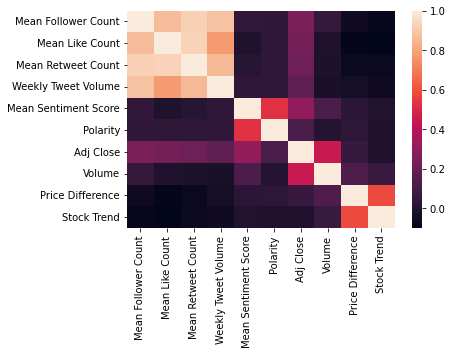

In [34]:
# compute the correlation between all pairs of variables in the data
corr  = data.corr()

# heatmap visualization of the correlation matrix
sns.heatmap(corr)

In [35]:
print(corr)

                      Mean Follower Count  Mean Like Count  \
Mean Follower Count              1.000000         0.865631   
Mean Like Count                  0.865631         1.000000   
Mean Retweet Count               0.922474         0.928101   
Weekly Tweet Volume              0.881182         0.775586   
Mean Sentiment Score             0.043939        -0.014441   
Polarity                         0.038757         0.034453   
Adj Close                        0.240714         0.227936   
Volume                           0.052556        -0.008089   
Price Difference                -0.055663        -0.092077   
Stock Trend                     -0.085843        -0.100760   

                      Mean Retweet Count  Weekly Tweet Volume  \
Mean Follower Count             0.922474             0.881182   
Mean Like Count                 0.928101             0.775586   
Mean Retweet Count              1.000000             0.857117   
Weekly Tweet Volume             0.857117             1.00

In [38]:
# calculate the Pearson correlation coefficient and p-value between all possible pairs of variables in the data DataFrame for which the p-value is less than 0.05

variables = ["Mean Follower Count", "Mean Like Count", "Mean Retweet Count", "Mean Sentiment Score", "Polarity", "Adj Close", "Volume", "Price Difference", "Stock Trend"]

correlations = []
# iterate over all combinations of variables
for var1, var2 in itertools.combinations(variables, 2):
    corr_coef, p_value = pearsonr(data[var1], data[var2])
    if p_value < 0.05:
        correlations.append((var1, var2, corr_coef, p_value))

# sort the output in descending order based on the correlation coefficient
correlations_sorted = sorted(correlations, key=lambda x: x[2], reverse=True)

# print the sorted output
for var1, var2, corr_coef, p_value in correlations_sorted:
    print(f"{var1} and {var2}: correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.2f}")

Mean Like Count and Mean Retweet Count: correlation coefficient = 0.93, p-value = 0.00
Mean Follower Count and Mean Retweet Count: correlation coefficient = 0.92, p-value = 0.00
Mean Follower Count and Mean Like Count: correlation coefficient = 0.87, p-value = 0.00
Price Difference and Stock Trend: correlation coefficient = 0.59, p-value = 0.00
Mean Sentiment Score and Polarity: correlation coefficient = 0.52, p-value = 0.00
Adj Close and Volume: correlation coefficient = 0.44, p-value = 0.00
Mean Sentiment Score and Adj Close: correlation coefficient = 0.30, p-value = 0.00
Mean Follower Count and Adj Close: correlation coefficient = 0.24, p-value = 0.00
Mean Like Count and Adj Close: correlation coefficient = 0.23, p-value = 0.00
Mean Retweet Count and Adj Close: correlation coefficient = 0.21, p-value = 0.00
Volume and Price Difference: correlation coefficient = 0.12, p-value = 0.00
Mean Sentiment Score and Volume: correlation coefficient = 0.12, p-value = 0.00
Polarity and Adj Close

# MODEL BUILDING (for Adj. CLose Price using Twitter data only)

### RANDOM FOREST

In [39]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Adj Close']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Random Forest Regressor with 100 estimators
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the regressor to the training data
rf.fit(X_train, y_train)

# get the feature importances
importances = rf.feature_importances_

# create a DataFrame to display the importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# sort the DataFrame by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# display the feature importances
print(feature_importances)

                Feature  Importance
1       Mean Like Count    0.592105
4  Mean Sentiment Score    0.154385
2    Mean Retweet Count    0.119007
3   Weekly Tweet Volume    0.085023
0   Mean Follower Count    0.048713
5              Polarity    0.000766


In [40]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Adj Close']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get all possible pairs, triplets, quadruplets, and quintuplets of X variables
X_combinations = []
for r in range(2, 7):
    X_combinations += list(combinations(X_train.columns, r))

# create empty lists to store the results
r2_scores = []
rmse_values = []
norm_rmse_values = []

# loop over each combination of X variables
for X_comb in X_combinations:
    # select the X variables for this combination
    X_train_comb = X_train[list(X_comb)]
    X_test_comb = X_test[list(X_comb)]
    
    # create a RandomForestRegressor model and fit it to the training data
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_comb, y_train)
    
    # use the model to predict on the test data
    y_pred = rf.predict(X_test_comb)
    
    # compute the r2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # compute the rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # compute the normalized rmse
    norm_rmse = rmse / (y_test.max() - y_test.min())
    norm_rmse_values.append(norm_rmse)

# create a DataFrame to store the results
results_df_rf = pd.DataFrame({
    'X_combinations': X_combinations,
    'r2_scores': r2_scores,
    'rmse_values': rmse_values,
    'norm_rmse_values': norm_rmse_values
})

# sort the DataFrame by R-squared score in descending order
results_df_rf = results_df_rf.sort_values(by='r2_scores', ascending=False)

# reset the index of the DataFrame
results_df_rf = results_df_rf.reset_index(drop=True)

In [41]:
results_df_rf.head(10)

,X_combinations,r2_scores,rmse_values,norm_rmse_values
0,"(Mean Follower Count, Mean Like Count, Mean Re...",0.733310,731.930871,0.169106
1,"(Mean Follower Count, Mean Like Count, Mean Re...",0.733289,731.959816,0.169112
2,"(Mean Follower Count, Mean Like Count, Mean Re...",0.722110,747.141629,0.172620
3,"(Mean Follower Count, Mean Like Count, Mean Re...",0.721957,747.347245,0.172667
4,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.721540,747.907740,0.172797
5,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.720911,748.751671,0.172992
6,"(Mean Follower Count, Mean Like Count, Mean Re...",0.701390,774.495407,0.178940
7,"(Mean Follower Count, Mean Like Count, Mean Re...",0.696410,780.927585,0.180426
8,"(Mean Like Count, Mean Retweet Count, Mean Sen...",0.693965,784.065276,0.181151
9,"(Mean Like Count, Mean Retweet Count, Mean Sen...",0.692985,785.319924,0.181441


In [42]:
results_df_rf.iloc[0]['X_combinations'] # this pair of variables has the highest r2_score in Random Forest

('Mean Follower Count',
 'Mean Like Count',
 'Mean Retweet Count',
 'Weekly Tweet Volume',
 'Mean Sentiment Score')

### GRADIENT BOOSTING REGRESSOR

In [43]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Adj Close']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get all possible pairs, triplets, quadruplets, and quintuplets of X variables
X_combinations = []
for r in range(2, 7):
    X_combinations += list(combinations(X_train.columns, r))

# create empty lists to store the results
r2_scores = []
rmse_values = []
norm_rmse_values = []

# loop over each combination of X variables
for X_comb in X_combinations:
    # select the X variables for this combination
    X_train_comb = X_train[list(X_comb)]
    X_test_comb = X_test[list(X_comb)]
    
    # create a RandomForestRegressor model and fit it to the training data
    gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gbr.fit(X_train_comb, y_train)
    
    # use the model to predict on the test data
    y_pred = gbr.predict(X_test_comb)
    
    # compute the r2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # compute the rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # compute the normalized rmse
    norm_rmse = rmse / (y_test.max() - y_test.min())
    norm_rmse_values.append(norm_rmse)

# create a DataFrame to store the results
results_df_gbr = pd.DataFrame({
    'X_combinations': X_combinations,
    'r2_scores': r2_scores,
    'rmse_values': rmse_values,
    'norm_rmse_values': norm_rmse_values
})

# sort the DataFrame by R-squared score in descending order
results_df_gbr = results_df_gbr.sort_values(by='r2_scores', ascending=False)

# reset the index of the DataFrame
results_df_gbr = results_df_gbr.reset_index(drop=True)

In [44]:
results_df_gbr.head(10)

,X_combinations,r2_scores,rmse_values,norm_rmse_values
0,"(Mean Follower Count, Mean Like Count, Mean Re...",0.716114,755.159956,0.174472
1,"(Mean Follower Count, Mean Like Count, Mean Re...",0.715849,755.512182,0.174554
2,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.711181,761.692819,0.175982
3,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.710558,762.513232,0.176171
4,"(Mean Like Count, Mean Retweet Count, Mean Sen...",0.709913,763.362894,0.176368
5,"(Mean Like Count, Mean Retweet Count, Mean Sen...",0.709835,763.465022,0.176391
6,"(Mean Follower Count, Mean Like Count, Mean Re...",0.706993,767.194953,0.177253
7,"(Mean Follower Count, Mean Like Count, Mean Re...",0.705179,769.565660,0.177801
8,"(Mean Follower Count, Mean Like Count, Mean Re...",0.677450,804.942873,0.185974
9,"(Mean Follower Count, Mean Like Count, Mean Re...",0.675922,806.848186,0.186415


In [45]:
results_df_gbr.iloc[0]['X_combinations'] # this pair of varibales gives the highest r2_score for Gradient Boosting Regressor

('Mean Follower Count',
 'Mean Like Count',
 'Mean Retweet Count',
 'Weekly Tweet Volume',
 'Mean Sentiment Score')

Conclusion: Random Forest gave best results with variables 'Mean Like Count',
 'Mean Retweet Count',
 'Weekly Tweet Volume',
 'Mean Sentiment Score' for model building - Adj. CLose Price using Twitter data

# MODEL BUILDING (for Stock Volume using Twitter data only)

### RANDOM FOREST

In [46]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Volume']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Random Forest Regressor with 100 estimators
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the regressor to the training data
rf.fit(X_train, y_train)

# get the feature importances
importances = rf.feature_importances_

# create a DataFrame to display the importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# sort the DataFrame by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# display the feature importances
print(feature_importances)

                Feature  Importance
1       Mean Like Count    0.348899
0   Mean Follower Count    0.198435
4  Mean Sentiment Score    0.166381
2    Mean Retweet Count    0.154268
3   Weekly Tweet Volume    0.128780
5              Polarity    0.003237


In [47]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Volume']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get all possible pairs, triplets, quadruplets, and quintuplets of X variables
X_combinations = []
for r in range(2, 7):
    X_combinations += list(combinations(X_train.columns, r))

# create empty lists to store the results
r2_scores = []
rmse_values = []
norm_rmse_values = []

# loop over each combination of X variables
for X_comb in X_combinations:
    # select the X variables for this combination
    X_train_comb = X_train[list(X_comb)]
    X_test_comb = X_test[list(X_comb)]
    
    # create a RandomForestRegressor model and fit it to the training data
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_comb, y_train)
    
    # use the model to predict on the test data
    y_pred = rf.predict(X_test_comb)
    
    # compute the r2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # compute the rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # compute the normalized rmse
    norm_rmse = rmse / (y_test.max() - y_test.min())
    norm_rmse_values.append(norm_rmse)

# create a DataFrame to store the results
results_df_rf = pd.DataFrame({
    'X_combinations': X_combinations,
    'r2_scores': r2_scores,
    'rmse_values': rmse_values,
    'norm_rmse_values': norm_rmse_values
})

# sort the DataFrame by R-squared score in descending order
results_df_rf = results_df_rf.sort_values(by='r2_scores', ascending=False)

# reset the index of the DataFrame
results_df_rf = results_df_rf.reset_index(drop=True)

In [48]:
results_df_rf.head(10)

,X_combinations,r2_scores,rmse_values,norm_rmse_values
0,"(Mean Follower Count, Mean Like Count, Mean Re...",0.244065,246332.790523,0.145617
1,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.241060,246821.945413,0.145906
2,"(Mean Follower Count, Mean Like Count, Mean Re...",0.240271,246950.062042,0.145982
3,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.237994,247319.932353,0.146200
4,"(Mean Follower Count, Mean Like Count, Mean Re...",0.231332,248398.618052,0.146838
5,"(Mean Follower Count, Mean Like Count, Mean Re...",0.229578,248681.921942,0.147005
6,"(Mean Follower Count, Mean Like Count, Mean Re...",0.226909,249112.375208,0.147260
7,"(Mean Follower Count, Mean Like Count, Mean Re...",0.225364,249361.090943,0.147407
8,"(Mean Follower Count, Mean Like Count, Mean Re...",0.225335,249365.821782,0.147410
9,"(Mean Follower Count, Mean Like Count, Mean Re...",0.222364,249843.462342,0.147692


### GRADIENT BOOSTING REGRESSOR

In [49]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Volume']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get all possible pairs, triplets, quadruplets, and quintuplets of X variables
X_combinations = []
for r in range(2, 7):
    X_combinations += list(combinations(X_train.columns, r))

# create empty lists to store the results
r2_scores = []
rmse_values = []
norm_rmse_values = []

# loop over each combination of X variables
for X_comb in X_combinations:
    # select the X variables for this combination
    X_train_comb = X_train[list(X_comb)]
    X_test_comb = X_test[list(X_comb)]
    
    # create a RandomForestRegressor model and fit it to the training data
    gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gbr.fit(X_train_comb, y_train)
    
    # use the model to predict on the test data
    y_pred = gbr.predict(X_test_comb)
    
    # compute the r2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # compute the rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # compute the normalized rmse
    norm_rmse = rmse / (y_test.max() - y_test.min())
    norm_rmse_values.append(norm_rmse)

# create a DataFrame to store the results
results_df_gbr = pd.DataFrame({
    'X_combinations': X_combinations,
    'r2_scores': r2_scores,
    'rmse_values': rmse_values,
    'norm_rmse_values': norm_rmse_values
})

# sort the DataFrame by R-squared score in descending order
results_df_gbr = results_df_gbr.sort_values(by='r2_scores', ascending=False)

# reset the index of the DataFrame
results_df_gbr = results_df_gbr.reset_index(drop=True)

In [50]:
results_df_gbr.head(10)

,X_combinations,r2_scores,rmse_values,norm_rmse_values
0,"(Mean Like Count, Mean Retweet Count)",0.314128,234639.604922,0.138704
1,"(Mean Like Count, Mean Retweet Count, Polarity)",0.312641,234893.813743,0.138855
2,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.295465,237810.633044,0.140579
3,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.277614,240804.528381,0.142349
4,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.247802,245723.165254,0.145256
5,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.237197,247449.265287,0.146277
6,"(Mean Like Count, Mean Retweet Count, Mean Sen...",0.233924,247979.597536,0.146590
7,"(Mean Like Count, Mean Retweet Count, Mean Sen...",0.229113,248756.990818,0.147050
8,"(Mean Like Count, Weekly Tweet Volume, Polarity)",0.213326,251291.205631,0.148548
9,"(Mean Follower Count, Mean Like Count, Mean Re...",0.207002,252299.230241,0.149144


Conclusion: Both the models i.e. Random Forest and Gradient Boosting Regressor gave bad results for model building - stock volume using twitter data